In [2]:
import pandas as pd

df = pd.read_csv("all_news.csv")

# Veri kümesini kontrol ediyorum
print(df.head())

                                               Title   Label
0  ABD Başkanı Trump ve destekçilerinin Rabia işa...  YANLIŞ
1              Fotoğrafta Atatürk'ün güldüğü iddiası  YANLIŞ
2  İsrail Başkonsolosluğu’nda ateş yakıldığını gö...  YANLIŞ
3  Afişin 2022 Dünya Kupası’ndaki yasakları göste...  YANLIŞ
4  İYİ Parti'de istifalar: Buğra Kavuncu ve Burak...   DOĞRU


In [3]:
# Eksik değerleri kontrol ediyorum
print(df.isnull().sum())

# Eksik değerleri dolduruyorum ya da kaldırıyorum
df = df.dropna()

Title    0
Label    0
dtype: int64


In [4]:
# Label sütunu boş olan satırlarda hem Label hem de Title sütunlarını siliyoruz
df = df[df['Label'].notnull()]

# Sonucu kontrol ediyoruz
print(df.head())

                                               Title   Label
0  ABD Başkanı Trump ve destekçilerinin Rabia işa...  YANLIŞ
1              Fotoğrafta Atatürk'ün güldüğü iddiası  YANLIŞ
2  İsrail Başkonsolosluğu’nda ateş yakıldığını gö...  YANLIŞ
3  Afişin 2022 Dünya Kupası’ndaki yasakları göste...  YANLIŞ
4  İYİ Parti'de istifalar: Buğra Kavuncu ve Burak...   DOĞRU


In [5]:
df = pd.read_csv("all_news.csv")

# "DOĞRU" ve "YANLIŞ" dışındaki etiketleri filtreliyoruz
other_labels = df[~df['Label'].str.contains('DOĞRU|YANLIŞ', case=False, na=False)]

# Bu satırları yazdırıyoruz, ilk 50 tanesini
print(other_labels[['Title', 'Label']].head(50))
# 'Label' sütunundaki boşlukları temizliyoruz
df['Label'] = df['Label'].str.strip()

Empty DataFrame
Columns: [Title, Label]
Index: []


In [6]:
#Metinlerin ön işlemi için kütüphaneler
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.preprocessing import LabelEncoder

In [7]:
# Gerekli NLTK verilerini indir
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Şerife
[nltk_data]     Gökdaş\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Şerife
[nltk_data]     Gökdaş\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Stopwords ve lemmatizer tanımla
STOPWORDS = set(stopwords.words('turkish'))
STOPWORDS.add('mi') 
lemmatizer = WordNetLemmatizer()

In [9]:
# Ön işleme fonksiyonu
def preprocess_text(text):
    # Küçük harfe çevir
    text = text.lower()
    # Noktalama işaretlerini kaldır
    text = re.sub(r'[^\w\s]', '', text)
    # Stopwords kaldır ve lemmatization uygula
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in STOPWORDS])
    return text

In [10]:
# CSV dosyasını oku
df = pd.read_csv('all_news.csv')
# Metinleri temizle
df['cleaned_text'] = df['Title'].apply(preprocess_text)

In [11]:
# Label sütununu sayısal değerlere çevirmek
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])

# Dönüştürme sonrasında ters çevirme
df['Label'] = df['Label'].map({0: 1, 1: 0})  # 0 -> 1, 1 -> 0 

# Etiket sınıfını kontrol et
print(df['Label'].head())

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64


In [12]:
# Temizlenmiş metin ve Label sütununu seçerek yeni bir dosya oluştur
df_cleaned = df[['cleaned_text', 'Label']]
df_cleaned.columns = ['Title', 'Label']  # Sütun isimlerini uygun şekilde düzenle

In [14]:
# Yeni CSV dosyasına sadece 'Title' ve 'Label' sütunlarını kaydet
df_cleaned.to_csv('data_all_news.csv', index=False, encoding='utf-8')

# İlk birkaç satırı kontrol et
print(df_cleaned.head())

                                               Title  Label
0  abd başkanı trump destekçilerinin rabia işaret...      0
1               fotoğrafta atatürkün güldüğü iddiası      0
2  israil başkonsolosluğunda ateş yakıldığını gös...      0
3  afişin 2022 dünya kupasındaki yasakları göster...      0
4  iyi partide istifalar buğra kavuncu burak akbu...      1


In [15]:
#Title sayısallaştırmadan önce max_words değerime karar vermek için
import pandas as pd

# CSV dosyasını yükleyin
df = pd.read_csv('data_all_news.csv')

# Kelimelerin sıklığını incelemek
from collections import Counter
all_words = [word for text in df['Title'] for word in text.split()]
word_counts = Counter(all_words)

# En yaygın 20 kelimeyi görmek
print(word_counts.most_common(20))
#çıktıya göre max_words 1500 olarak belirleyebilirim

[('iddiası', 3692), ('bir', 1282), ('gösterdiği', 1166), ('gösteriyor', 989), ('video', 839), ('olduğu', 809), ('videonun', 618), ('fotoğrafın', 538), ('fotoğraf', 391), ('gerçek', 333), ('yeni', 297), ('ait', 290), ('güncel', 252), ('kişi', 248), ('doğru', 240), ('türkiye', 240), ('gösteren', 225), ('edilen', 224), ('iddia', 209), ('istanbul', 196)]


In [16]:
import numpy as np
from collections import Counter

# Kelime frekanslarını hesapla
all_words = [word for text in df['Title'] for word in text.split()]
word_counts = Counter(all_words)

# Kelime frekanslarını sıralayıp birikimli toplamını al
word_freq = [count for _, count in word_counts.most_common()]
cumulative_freq = np.cumsum(word_freq)
total_words = sum(word_freq)

# Belirli max_words için kapsanan yüzdeyi göster
for max_words in [500, 1000, 1500, 2000]:
    coverage = (cumulative_freq[max_words-1] / total_words) * 100
    print(f"{max_words} kelime ile toplam kelime frekansının %{coverage:.2f}'i kapsanıyor.")

500 kelime ile toplam kelime frekansının %38.58'i kapsanıyor.
1000 kelime ile toplam kelime frekansının %48.47'i kapsanıyor.
1500 kelime ile toplam kelime frekansının %55.19'i kapsanıyor.
2000 kelime ile toplam kelime frekansının %60.30'i kapsanıyor.


count    12723.000000
mean         8.370824
std          2.708271
min          1.000000
25%          7.000000
50%          8.000000
75%         10.000000
max         25.000000
Name: title_length, dtype: float64


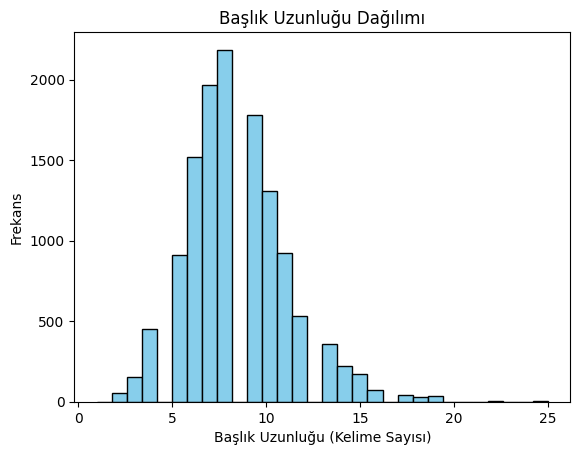

In [17]:
#Title sayısallaştırmadan önce max_len değerime karar vermek için
import pandas as pd

# CSV dosyasını yükle
df = pd.read_csv("data_all_news.csv")

# Başlıkların uzunluklarını hesaplama (kelime sayısı)
df['title_length'] = df['Title'].apply(lambda x: len(x.split()))

# Uzunlukların istatistiklerini görmek
print(df['title_length'].describe())

# Başlık uzunluklarının dağılımını görmek için
import matplotlib.pyplot as plt
plt.hist(df['title_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Başlık Uzunluğu Dağılımı')
plt.xlabel('Başlık Uzunluğu (Kelime Sayısı)')
plt.ylabel('Frekans')
plt.show()
#çıktıya göre max_len 15 olarak belirleyebilirim

In [ ]:
#tokenizer_data.ipynb da tokenizer işlemleri yapıldı.